In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import collections  as mc
import numpy as np
import plotly.express as px

#import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
from matplotlib.colors import Normalize 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz
from IPython.display import SVG

import scipy.stats as stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

import matplotlib.pyplot as plt

import warnings
import string

import plotly.graph_objects as go
import plotly.offline as pyo
# Set notebook mode to work in offline
pyo.init_notebook_mode()

import plotly.io as pio
pio.renderers
pio.renderers.default = "pdf"

from itertools import *

warnings.filterwarnings('ignore')

%matplotlib inline

### Load and format the datasets

In [2]:
metro_df_1504 = pd.read_csv('employeedata/2015-04.csv')
metro_df_1510 = pd.read_csv('employeedata/2015-10.csv')
metro_df_1601 = pd.read_csv('employeedata/2016-01.csv')
metro_df_1604 = pd.read_csv('employeedata/2016-04.csv')
metro_df_1607 = pd.read_csv('employeedata/2016-07.csv')
metro_df_1610 = pd.read_csv('employeedata/2016-10.csv')
metro_df_1701 = pd.read_csv('employeedata/2017-01.csv')
metro_df_1704 = pd.read_csv('employeedata/2017-04.csv')
metro_df_1707 = pd.read_csv('employeedata/2017-07.csv')
metro_df_1710 = pd.read_csv('employeedata/2017-10.csv')
metro_df_1801 = pd.read_csv('employeedata/2018-01.csv')
metro_df_1804 = pd.read_csv('employeedata/2018-04.csv')
metro_df_1807 = pd.read_csv('employeedata/2018-07.csv')
metro_df_1810 = pd.read_csv('employeedata/2018-10.csv')
metro_df_1901 = pd.read_csv('employeedata/2019-01.csv')
metro_df_1904 = pd.read_csv('employeedata/2019-04.csv')
metro_df_1907 = pd.read_csv('employeedata/2019-07.csv')
metro_df_2001 = pd.read_csv('employeedata/2020-01.csv')
metro_df_2004 = pd.read_csv('employeedata/2020-04.csv')
metro_df_2008 = pd.read_csv('employeedata/2020-08.csv')
metro_df_2101 = pd.read_csv('employeedata/2021-01.csv')

#### add a date column to each dataset

In [3]:
metro_df_1504['DataDate'] = "2015-04"
metro_df_1510['DataDate'] = "2015-10"
metro_df_1601['DataDate'] = "2016-01"
metro_df_1604['DataDate'] = "2016-04"
metro_df_1607['DataDate'] = "2016-07"
metro_df_1610['DataDate'] = "2016-10"
metro_df_1701['DataDate'] = "2017-01"
metro_df_1704['DataDate'] = "2017-04"
metro_df_1707['DataDate'] = "2017-07"
metro_df_1710['DataDate'] = "2017-10"
metro_df_1801['DataDate'] = "2018-01"
metro_df_1804['DataDate'] = "2018-04"
metro_df_1807['DataDate'] = "2018-07"
metro_df_1810['DataDate'] = "2018-10"
metro_df_1901['DataDate'] = "2019-01"
metro_df_1904['DataDate'] = "2019-04"
metro_df_1907['DataDate'] = "2019-07"
metro_df_2001['DataDate'] = "2020-01"
metro_df_2004['DataDate'] = "2020-04"
metro_df_2008['DataDate'] = "2020-08"
metro_df_2101['DataDate'] = "2021-01"

In [4]:
metro_df_1504.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1510.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'DataDate']
metro_df_1601.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'DataDate']
metro_df_1604.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'DataDate']
metro_df_1607.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'DataDate']
metro_df_1610.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'DataDate']
metro_df_1701.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1704.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1707.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1710.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1801.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1804.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1807.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1810.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1901.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1904.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_1907.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status', 'EEO Job Cat',
       'EEO Job Cat Desc', 'Gender', 'Ethnic Code', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_2001.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status',
       'EEO Job Cat Desc', 'Gender', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_2004.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status',
       'EEO Job Cat Desc', 'Gender', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_2008.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status',
       'EEO Job Cat Desc', 'Gender', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']
metro_df_2101.columns = ['Pay Grade/Step', 'Salary', 'Class', 'Title', 'Dept', 'Employment Status',
       'EEO Job Cat Desc', 'Gender', 'Ethnicity', 'Birth Year', 'StartDate', 'FLSA Exempt Y/N', 'County', 'DataDate']

#### Concatenate the datasets for a huge dataset
 this will allow me to format the whole thing as one

In [5]:
frames = [metro_df_1504, metro_df_1510,  metro_df_1601, metro_df_1604, metro_df_1607, metro_df_1610, metro_df_1701, metro_df_1704, metro_df_1707, metro_df_1710, metro_df_1801, metro_df_1804, metro_df_1807, metro_df_1810, metro_df_1901, metro_df_1904, metro_df_1907, metro_df_2001, metro_df_2004, metro_df_2008, metro_df_2101 ]
master_df = pd.concat(frames)

In [7]:
master_df.head()

Pay Grade/Step   Salary    Class                          Title  \
0         SR1200  54282.6   7783.0     Info Systems App Analyst 3   
1         SR0401  23113.2   2900.0             Circulation Asst 1   
2         MAC08B  37426.7  10236.0            Headstart Teacher 2   
3             NS    35148      NaN                              .   
4             NS    63125  10661.0  Special Proj Asst-Mayor's Off   

                             Dept Employment Status  EEO Job Cat  \
0  Information Technology Service         Full Time          2.0   
1                  Public Library         Full Time          6.0   
2         Metro Action Commission         Full Time          2.0   
3         Circuit Court Satellite         Full Time          6.0   
4                  Administrative         Full Time          2.0   

         EEO Job Cat Desc Gender  Ethnic Code                       Ethnicity  \
0           Professionals      F          1.0  White (Not of Hispanic Origin)   
1  Administrative Support      F          2.0                           Black   
2           Professionals      F          1.0  White (Not of Hispanic Origin)   
3  Administrative Support      F          2.0                           Black   
4           Professionals      M          1.0  White (Not of Hispanic Origin)   

   Birth Year   StartDate FLSA Exempt Y/N      County DataDate  
0        1974  10/25/2012               Y    DAVIDSON  2015-04  
1        1988  12/08/2014               N    DAVIDSON  2015-04  
2        1986  10/29/2012               N  WILLIAMSON  2015-04  
3        1956  11/01/2012               N    DAVIDSON  2015-04  
4        1987  10/29/2012               N    DAVIDSON  2015-04

#### Format the huge data frame in the same way as above

In [8]:
# Keep only the columns we want
master_df1 = master_df[['Salary', 'Title', 'Dept', 'Gender', 'Ethnicity', 'Birth Year', 'StartDate', 'DataDate']]


#### Rename some of these columns

In [9]:
master_df1.head()

Salary                          Title                            Dept  \
0  54282.6     Info Systems App Analyst 3  Information Technology Service   
1  23113.2             Circulation Asst 1                  Public Library   
2  37426.7            Headstart Teacher 2         Metro Action Commission   
3    35148                              .         Circuit Court Satellite   
4    63125  Special Proj Asst-Mayor's Off                  Administrative   

  Gender                       Ethnicity  Birth Year   StartDate DataDate  
0      F  White (Not of Hispanic Origin)        1974  10/25/2012  2015-04  
1      F                           Black        1988  12/08/2014  2015-04  
2      F  White (Not of Hispanic Origin)        1986  10/29/2012  2015-04  
3      F                           Black        1956  11/01/2012  2015-04  
4      M  White (Not of Hispanic Origin)        1987  10/29/2012  2015-04

#### Keep only the year of the start date, as an integer

In [10]:
master_df1.StartDate = master_df1.StartDate.str[-4:]

In [11]:
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196648 entries, 0 to 9551
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Salary      196038 non-null  object
 1   Title       196648 non-null  object
 2   Dept        196648 non-null  object
 3   Gender      196648 non-null  object
 4   Ethnicity   196609 non-null  object
 5   Birth Year  196648 non-null  int64 
 6   StartDate   196648 non-null  object
 7   DataDate    196648 non-null  object
dtypes: int64(1), object(7)
memory usage: 13.5+ MB


In [12]:
master_df1.StartDate = master_df1.StartDate.astype(int)
master_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196648 entries, 0 to 9551
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Salary      196038 non-null  object
 1   Title       196648 non-null  object
 2   Dept        196648 non-null  object
 3   Gender      196648 non-null  object
 4   Ethnicity   196609 non-null  object
 5   Birth Year  196648 non-null  int64 
 6   StartDate   196648 non-null  int64 
 7   DataDate    196648 non-null  object
dtypes: int64(2), object(6)
memory usage: 13.5+ MB


#### Create Age from Birth Year & Tenure from Start Date

- Begin the for-loop to iterate through `metro_df1` 
    - Store the row's birth year in a variable called `birth`.
    - Store each row's `age` in a variable called `age`.
    - `append` `age` to `metro_df1`.

In [19]:
age = []
tenure = []
for row in master_df1.iterrows():
    vals = row[1]
    birth = vals['Birth Year']
    start = vals['StartDate']
    age.append(2021 - birth)
    tenure.append(2021 - start)

Assign `age` to a new column in `metro_df1` called `Age`.

In [20]:
master_df1['Age'] = age
master_df1['Tenure'] = tenure
master_df1.head()

Salary                          Title                            Dept  \
0  54282.6     Info Systems App Analyst 3  Information Technology Service   
1  23113.2             Circulation Asst 1                  Public Library   
2  37426.7            Headstart Teacher 2         Metro Action Commission   
3    35148                              .         Circuit Court Satellite   
4    63125  Special Proj Asst-Mayor's Off                  Administrative   

  Gender                       Ethnicity  Birth Year  StartDate DataDate  Age  \
0      F  White (Not of Hispanic Origin)        1974       2012  2015-04   47   
1      F                           Black        1988       2014  2015-04   33   
2      F  White (Not of Hispanic Origin)        1986       2012  2015-04   35   
3      F                           Black        1956       2012  2015-04   65   
4      M  White (Not of Hispanic Origin)        1987       2012  2015-04   34   

   Tenure  
0       9  
1       7  
2       9  
3       9  
4       9

#### Make a dict for Ethnicity so it's just easier to read

In [21]:
master_df1.Ethnicity.unique()

array(['White (Not of Hispanic Origin)', 'Black', 'Hispanic',
       'Asian or Pacific Islander', 'Two or More Races', 'Unknown',
       'Hawaiian or Pacific Islander', 'American Indian/Alaskan Native',
       'Asian', 'White', 'Black or African American',
       'Hispanic or Latino of any race',
       'American Indian or Alaskan Native',
       'Native Hawaiian or Other Pacific', nan], dtype=object)

In [22]:
### going to combine Asian & Pacific Islander because one or more of the datasets does
race_dict = dict([('White (Not of Hispanic Origin)','White'),('Black or African American','Black'), 
                    ('Hispanic or Latino of any race','Hispanic/Latino'),
                    ('Two or More Races','Multiple'), 
                    ('Hispanic','Hispanic/Latino'), 
                    ('American Indian or Alaskan Native','Native American'),
                    ('American Indian/Alaskan Native', 'Native American'),
                    ('Native Hawaiian or Other Pacific','Asian or Pacific Islander'), 
                    ('Hawaiian or Pacific Islander', 'Asian or Pacific Islander'),
                    ('Asian', 'Asian or Pacific Islander'),
                    ('Unreported', 'Unknown'),
                    ('nan','Unknown')])

In [23]:
master_df2 = master_df1.copy()

In [24]:
master_df2 = master_df2.replace({"Ethnicity": race_dict})

In [25]:
master_df2.Ethnicity.unique()

array(['White', 'Black', 'Hispanic/Latino', 'Asian or Pacific Islander',
       'Multiple', 'Unknown', 'Native American', nan], dtype=object)

In [26]:
master_df2.Ethnicity.fillna(value = 'Unknown', inplace = True)
master_df2.Ethnicity.unique()

array(['White', 'Black', 'Hispanic/Latino', 'Asian or Pacific Islander',
       'Multiple', 'Unknown', 'Native American'], dtype=object)

#### Create an intersxnl term for race x gender, & new job title with dept


In [27]:
inter = []
newtitle = []
for row in master_df2.iterrows():
    vals = row[1]
    race = vals['Ethnicity']
    gen = vals['Gender']
    title = vals['Title']
    dept = vals['Dept']
    inter.append(race + gen)
    newtitle.append(title + dept)

In [28]:
master_df2['InterSn'] = inter
master_df2['NewTitle'] = newtitle
master_df2.head(7)

Salary                          Title                            Dept  \
0  54282.6     Info Systems App Analyst 3  Information Technology Service   
1  23113.2             Circulation Asst 1                  Public Library   
2  37426.7            Headstart Teacher 2         Metro Action Commission   
3    35148                              .         Circuit Court Satellite   
4    63125  Special Proj Asst-Mayor's Off                  Administrative   
5  63782.8                  Finance Admin                         Finance   
6  34514.7         Correctional Officer 1                         Sheriff   

  Gender Ethnicity  Birth Year  StartDate DataDate  Age  Tenure InterSn  \
0      F     White        1974       2012  2015-04   47       9  WhiteF   
1      F     Black        1988       2014  2015-04   33       7  BlackF   
2      F     White        1986       2012  2015-04   35       9  WhiteF   
3      F     Black        1956       2012  2015-04   65       9  BlackF   
4      M     White        1987       2012  2015-04   34       9  WhiteM   
5      F     White        1972       2012  2015-04   49       9  WhiteF   
6      M     White        1989       2012  2015-04   32       9  WhiteM   

                                            NewTitle  
0  Info Systems App Analyst 3Information Technolo...  
1                   Circulation Asst 1Public Library  
2         Headstart Teacher 2Metro Action Commission  
3                           .Circuit Court Satellite  
4        Special Proj Asst-Mayor's OffAdministrative  
5                               Finance AdminFinance  
6                      Correctional Officer 1Sheriff

# Have there been changes in employment or compensation since 2015?


In [29]:
# Recoding value from numeric to string
master_df2['Gender'].replace({1: 'M', 2: 'F'}, inplace= True)

In [30]:
#need to remove comma from Salary column
master_df2 = master_df2.replace(',','', regex=True)


In [31]:
# need to make the Salary column numeric to do analysis on it
master_df2.Salary = pd.to_numeric(master_df2.Salary)

In [32]:
#getting summary info on the Salary by ethnicity
rp.summary_cont(master_df2['Salary'].groupby(master_df2['Ethnicity']))

N        Mean          SD        SE  \
Ethnicity                                                             
Asian or Pacific Islander    1809  52503.9336  20902.2176  491.4429   
Black                       53600  44589.1488  21644.8547   93.4915   
Hispanic/Latino              4550  46276.3680  18732.6015  277.7106   
Multiple                     2612  55288.5974  18249.0656  357.0706   
Native American               390  54020.9403  15019.4469  760.5393   
Unknown                       850  45283.0992  24747.4808  848.8316   
White                      132227  55431.6402  23128.6487   63.6048   

                            95% Conf.    Interval  
Ethnicity                                          
Asian or Pacific Islander  51540.0780  53467.7893  
Black                      44405.9046  44772.3929  
Hispanic/Latino            45731.9205  46820.8156  
Multiple                   54588.4273  55988.7674  
Native American            52525.6585  55516.2222  
Unknown                    43617.0447  46949.1537  
White                      55306.9759  55556.3046

In [33]:
#getting summary info on the Salary by gender
rp.summary_cont(master_df2['Salary'].groupby(master_df2['Gender']))

N        Mean          SD       SE   95% Conf.    Interval
Gender                                                                 
F        73809  47499.2161  23572.2291  86.7653  47329.1565  47669.2757
M       122229  55004.7692  22305.9620  63.8019  54879.7185  55129.8199

### Stacked line graph of employment demographics (gender, then ethnicity) across the years. Use Friedman's test (non parametric for repeated measures ANOVA)

In [34]:
### Need to figure out how to get the data-date to be numerical/time.
### Do a groupby dataframe for ethnicity / gender
### Make a separate column that starts at 0, and then counts the months since the start
### Make a separate column for percent of employees for that demographic

In [35]:
Mo = []
Race = []
Total = []
#EthSal = []
for date in master_df2.DataDate.unique():
    for eth in master_df2.Ethnicity.unique():
       # sal = (master_df2[master_df2.DataDate == date].Ethnicity.values == eth).Salary.sum()
        tot = (master_df2[master_df2.DataDate == date].Ethnicity.values == eth).sum()
        if (date == "2015-04"):
            months = 0
        if (date == "2015-10"):
            months = 6
        if (date == "2016-01"):
            months = 9
        if (date == "2016-04"):
            months = 12
        if (date == "2016-07"):
            months = 15
        if (date == "2016-10"):
            months = 18
        if (date == "2017-01"):
            months = 21
        if (date == "2017-04"):
            months = 24
        if (date == "2017-07"):
            months = 27
        if (date == "2017-10"):
            months = 30
        if (date == "2018-01"):
            months = 33
        if (date == "2018-04"):
            months = 36
        if (date == "2018-07"):
            months = 39
        if (date == "2018-10"):
            months = 42
        if (date == "2019-01"):
            months = 45
        if (date == "2019-04"):
            months = 48
        if (date == "2019-07"):
            months = 51
        if (date == "2019-10"):
            months = 54
        if (date == "2020-01"):
            months = 57
        if (date == "2020-04"):
            months = 60
        if (date == "2020-08"):
            months = 64
        if (date == "2021-01"):
            months = 69    
       # print(months, eth, tot)
        Mo.append(months)
        Race.append(eth)
        Total.append(tot)
       # EthSal.append(sal)
###working on summing up the salaries

In [36]:
d = {'MonthsSinceStart':Mo,'Ethnicity':Race,'TotalEmployees':Total}
demobymonth = pd.DataFrame(d)
demobymonth.shape

(147, 3)

In [37]:
Cumu = []
for month in demobymonth.MonthsSinceStart.unique():
    cumulative = 0
    for row in demobymonth[demobymonth.MonthsSinceStart == month].iterrows():
        vals = row[1]
        num = vals['TotalEmployees']
        cumulative = cumulative + num
    Cumu.append(cumulative)
Cumu7 =  [ele for ele in Cumu for i in range(7)] 
demobymonth['OverallTotal'] = Cumu7


In [38]:
Perc = []
for month in demobymonth.MonthsSinceStart.unique():
    for row in demobymonth[demobymonth.MonthsSinceStart == month].iterrows():
        vals = row[1]
        num = vals['TotalEmployees']
        over = vals['OverallTotal']
        percent = num / over
        Perc.append(percent)
demobymonth['PercentOverall'] = Perc
demobymonth.head(8)

MonthsSinceStart                  Ethnicity  TotalEmployees  OverallTotal  \
0                 0                      White            6287          8954   
1                 0                      Black            2365          8954   
2                 0            Hispanic/Latino             172          8954   
3                 0  Asian or Pacific Islander              71          8954   
4                 0                   Multiple               3          8954   
5                 0                    Unknown              44          8954   
6                 0            Native American              12          8954   
7                 6                      White            6311          9048   

   PercentOverall  
0        0.702144  
1        0.264128  
2        0.019209  
3        0.007929  
4        0.000335  
5        0.004914  
6        0.001340  
7        0.697502

In [39]:
### Then create a basic stacked area chart 
###      where x = months since start and y = percent of employees for that demographic

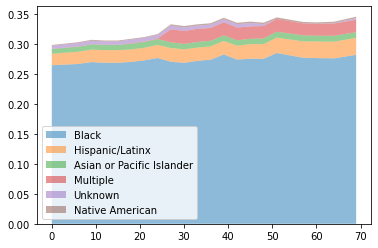

In [40]:
x = demobymonth.MonthsSinceStart.unique()
#y1 = demobymonth.query("Ethnicity == 'White'").PercentOverall
y2 = demobymonth.query("Ethnicity == 'Black'").PercentOverall
y3 = demobymonth.query("Ethnicity == 'Hispanic/Latino'").PercentOverall
y4 = demobymonth.query("Ethnicity == 'Asian or Pacific Islander'").PercentOverall
y5 = demobymonth.query("Ethnicity == 'Multiple'").PercentOverall
y6 = demobymonth.query("Ethnicity == 'Unknown'").PercentOverall
y7 = demobymonth.query("Ethnicity == 'Native American'").PercentOverall

#plt.stackplot(x,y1, y2, y3, y4, y5, y6, y7, labels=['White','Black','Hispanic/Latinx', 'Asian or Pacific Islander', 'Multiple', 'Unknown', 'Native American'])
plt.stackplot(x, y2, y3, y4, y5, y6, y7, alpha = 0.5, labels=['Black','Hispanic/Latinx', 'Asian or Pacific Islander', 'Multiple', 'Unknown', 'Native American'])
plt.legend(loc='lower left')
plt.savefig("EthnicitybyMonthsSinceStart.pdf")

In [41]:
demobymonth.MonthsSinceStart.unique()

array([ 0,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       57, 60, 64, 69])

In [42]:
# Friedman's test here (ANOVA for repeated measures)
# define the independent samples
data1 = demobymonth.query("MonthsSinceStart == '0'").PercentOverall
data2 = demobymonth.query("MonthsSinceStart == '6'").PercentOverall
data3 = demobymonth.query("MonthsSinceStart == '9'").PercentOverall
data4 = demobymonth.query("MonthsSinceStart == '12'").PercentOverall
data5 = demobymonth.query("MonthsSinceStart == '15'").PercentOverall
data6 = demobymonth.query("MonthsSinceStart == '18'").PercentOverall
data7 = demobymonth.query("MonthsSinceStart == '21'").PercentOverall
data8 = demobymonth.query("MonthsSinceStart == '24'").PercentOverall
data9 = demobymonth.query("MonthsSinceStart == '27'").PercentOverall
data10 = demobymonth.query("MonthsSinceStart == '30'").PercentOverall
data11 = demobymonth.query("MonthsSinceStart == '33'").PercentOverall
data12 = demobymonth.query("MonthsSinceStart == '36'").PercentOverall
data13 = demobymonth.query("MonthsSinceStart == '39'").PercentOverall
data14 = demobymonth.query("MonthsSinceStart == '42'").PercentOverall
data15 = demobymonth.query("MonthsSinceStart == '45'").PercentOverall
data16 = demobymonth.query("MonthsSinceStart == '48'").PercentOverall
data17 = demobymonth.query("MonthsSinceStart == '51'").PercentOverall
data18 = demobymonth.query("MonthsSinceStart == '57'").PercentOverall
data19 = demobymonth.query("MonthsSinceStart == '60'").PercentOverall
data20 = demobymonth.query("MonthsSinceStart == '64'").PercentOverall
data21 = demobymonth.query("MonthsSinceStart == '69'").PercentOverall

# compare samples
stat, p = stats.friedmanchisquare(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=22.380, p=0.320
Same distributions (fail to reject H0)


In [50]:
y2 = demobymonth.query("Ethnicity == 'Black'").PercentOverall
y3 = demobymonth.query("Ethnicity == 'Hispanic/Latino'").PercentOverall
y4 = demobymonth.query("Ethnicity == 'Asian or Pacific Islander'").PercentOverall
y5 = demobymonth.query("Ethnicity == 'Multiple'").PercentOverall
y6 = demobymonth.query("Ethnicity == 'Unknown'").PercentOverall
y7 = demobymonth.query("Ethnicity == 'Native American'").PercentOverall
y7 #black 26.4 --> 28.2
    #HL 1.9 --> 2.8 ***
    #Asian / Pacific Islander 0.8 --> 1
    #Multiple 0.03 --> 2.1
    #unknown 0.5 --> 0.3
    #Native American 0.1 --> 0.2

6      0.001340
13     0.001437
20     0.001555
27     0.001546
34     0.001546
41     0.001396
48     0.001394
55     0.001391
62     0.002310
69     0.002433
76     0.002246
83     0.002228
90     0.002253
97     0.002336
104    0.002351
111    0.002351
118    0.002472
125    0.002307
132    0.002200
139    0.002301
146    0.002094
Name: PercentOverall, dtype: float64

In [51]:
#Now we want to look at gender
Mo = []
Gend = []
Total = []
for date in master_df2.DataDate.unique():
    for gen in master_df2.Gender.unique():
        tot = (master_df2[master_df2.DataDate == date].Gender.values == gen).sum()
        if (date == "2015-04"):
            months = 0
        if (date == "2015-10"):
            months = 6
        if (date == "2016-01"):
            months = 9
        if (date == "2016-04"):
            months = 12
        if (date == "2016-07"):
            months = 15
        if (date == "2016-10"):
            months = 18
        if (date == "2017-01"):
            months = 21
        if (date == "2017-04"):
            months = 24
        if (date == "2017-07"):
            months = 27
        if (date == "2017-10"):
            months = 30
        if (date == "2018-01"):
            months = 33
        if (date == "2018-04"):
            months = 36
        if (date == "2018-07"):
            months = 39
        if (date == "2018-10"):
            months = 42
        if (date == "2019-01"):
            months = 45
        if (date == "2019-04"):
            months = 48
        if (date == "2019-07"):
            months = 51
        if (date == "2019-10"):
            months = 54
        if (date == "2020-01"):
            months = 57
        if (date == "2020-04"):
            months = 60
        if (date == "2020-08"):
            months = 64
        if (date == "2021-01"):
            months = 69
       # print(months, eth, tot)
        Mo.append(months)
        Gend.append(gen)
        Total.append(tot)

In [53]:
d = {'MonthsSinceStart':Mo,'Gender':Gend,'TotalEmployees':Total}
gendbymonth = pd.DataFrame(d)
gendbymonth.shape

(42, 3)

In [54]:
Cumu = []
for month in gendbymonth.MonthsSinceStart.unique():
    cumulative = 0
    for row in gendbymonth[gendbymonth.MonthsSinceStart == month].iterrows():
        vals = row[1]
        num = vals['TotalEmployees']
        cumulative = cumulative + num
    Cumu.append(cumulative)
Cumu2 =  [ele for ele in Cumu for i in range(2)] 
gendbymonth['OverallTotal'] = Cumu2


In [55]:
Perc = []
for month in gendbymonth.MonthsSinceStart.unique():
    for row in gendbymonth[gendbymonth.MonthsSinceStart == month].iterrows():
        vals = row[1]
        num = vals['TotalEmployees']
        over = vals['OverallTotal']
        percent = num / over
        Perc.append(percent)
gendbymonth['PercentOverall'] = Perc
gendbymonth.head(8)

MonthsSinceStart Gender  TotalEmployees  OverallTotal  PercentOverall
0                 0      F            3288          8954        0.367210
1                 0      M            5666          8954        0.632790
2                 6      F            3322          9048        0.367153
3                 6      M            5726          9048        0.632847
4                 9      F            3320          9002        0.368807
5                 9      M            5682          9002        0.631193
6                12      F            3350          9057        0.369880
7                12      M            5707          9057        0.630120

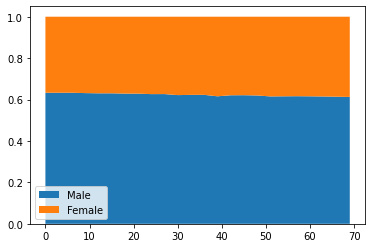

In [56]:
x = gendbymonth.MonthsSinceStart.unique()
y1 = gendbymonth.query("Gender == 'M'").PercentOverall
y2 = gendbymonth.query("Gender == 'F'").PercentOverall

plt.stackplot(x, y1, y2, labels=['Male', 'Female'])
plt.legend(loc='lower left')
plt.savefig("GenderbyMonthsSinceStart.pdf")

In [58]:
y1 = gendbymonth.query("Gender == 'M'").PercentOverall
y2 = gendbymonth.query("Gender == 'F'").PercentOverall
y1 #male 63.3 --> 61.3
    #female 36.7 --> 38.7    

1     0.632790
3     0.632847
5     0.631193
7     0.630120
9     0.630120
11    0.628651
13    0.628446
15    0.626244
17    0.626444
19    0.621456
21    0.622607
23    0.622640
25    0.615692
27    0.620646
29    0.620966
31    0.619617
33    0.615099
35    0.616167
37    0.615610
39    0.614475
41    0.612542
Name: PercentOverall, dtype: float64

In [59]:
master_df2.head(7)
Mo = []
for date in master_df2.DataDate:
        if (date == "2015-04"):
            months = 0
        if (date == "2015-10"):
            months = 6
        if (date == "2016-01"):
            months = 9
        if (date == "2016-04"):
            months = 12
        if (date == "2016-07"):
            months = 15
        if (date == "2016-10"):
            months = 18
        if (date == "2017-01"):
            months = 21
        if (date == "2017-04"):
            months = 24
        if (date == "2017-07"):
            months = 27
        if (date == "2017-10"):
            months = 30
        if (date == "2018-01"):
            months = 33
        if (date == "2018-04"):
            months = 36
        if (date == "2018-07"):
            months = 39
        if (date == "2018-10"):
            months = 42
        if (date == "2019-01"):
            months = 45
        if (date == "2019-04"):
            months = 48
        if (date == "2019-07"):
            months = 51
        if (date == "2019-10"):
            months = 54
        if (date == "2020-01"):
            months = 57
        if (date == "2020-04"):
            months = 60
        if (date == "2020-08"):
            months = 64
        if (date == "2021-01"):
            months = 69            
       # print(months, eth, tot)
        Mo.append(months)

In [60]:
master_df2['MonthsSinceStart'] = Mo

In [61]:
master_df2.head()

Salary                          Title                            Dept  \
0  54282.61     Info Systems App Analyst 3  Information Technology Service   
1  23113.20             Circulation Asst 1                  Public Library   
2  37426.69            Headstart Teacher 2         Metro Action Commission   
3  35148.00                              .         Circuit Court Satellite   
4  63125.00  Special Proj Asst-Mayor's Off                  Administrative   

  Gender Ethnicity  Birth Year  StartDate DataDate  Age  Tenure InterSn  \
0      F     White        1974       2012  2015-04   47       9  WhiteF   
1      F     Black        1988       2014  2015-04   33       7  BlackF   
2      F     White        1986       2012  2015-04   35       9  WhiteF   
3      F     Black        1956       2012  2015-04   65       9  BlackF   
4      M     White        1987       2012  2015-04   34       9  WhiteM   

                                            NewTitle  MonthsSinceStart  
0  Info Systems App Analyst 3Information Technolo...                 0  
1                   Circulation Asst 1Public Library                 0  
2         Headstart Teacher 2Metro Action Commission                 0  
3                           .Circuit Court Satellite                 0  
4        Special Proj Asst-Mayor's OffAdministrative                 0

### <font color='red'> Ethnicity Proportions - compensation</font>
    I want to do this two ways - 
           1) add up salaries for everyone, show what percentage of money in salary form goes to each demographic (like graphs above), can add this to the "demobymonth" df
           2) find average salary for each demographic for each quarter, then do a line graph (?) of the average salaries across the years for each demo


### <font color='red'> Gender Proportions - compensation </font>
    I want to do this two ways - 
        1) add up salaries to men/women for each quarter, show what percentage of money in salary form goes to men and what percentage goes to women (like above), can add this to the "gendbymonth" df
        2) find average salary for men / women for each quarter, then do a line graph of the average salaries across the years

### <font color='red'> Ethnicity Proportions - Population Changes</font>

### <font color='red'> Gender Proportions - population changes </font>

In [66]:
# Go down to "Salary & Tenure by Gender & Ethnicity" to invoke 'latest'
#Just needed to find out how many departments there are in Metro
len(pd.unique(latest.Dept))

56

In [67]:
# I'd like to find the number of employees in each department
rp.summary_cont(latest['Salary'].groupby(latest['Dept']))

N         Mean          SD  \
Dept                                                                   
Administrative                            0          NaN         NaN   
Agricultural Extension                    7   36665.8271   5989.0993   
Arts Commission                          12   64158.1792  25411.1937   
Assessor of Property                     77   56302.3355  22697.2728   
Beer Board                                6   57467.5033  27601.8882   
Circuit Court Clerk                      36   51366.7261  12897.1258   
Circuit Court Satellite                  64   57086.3548  20190.1500   
Clerk and Master                         15   61168.8607  31045.5722   
Codes Administration                    118   55593.2931  22331.1460   
Community Ed Commission                   3   53705.7800  19923.3960   
Community Oversight Board                 9   73054.3900  26293.0705   
Convention Center Authority             137   52435.2979  37081.2887   
County Clerk                             79   39474.5509  21515.9720   
Criminal Court Clerk                     87   50886.3297  19845.0846   
Criminal Justice Planning Unit            4   92215.1000  37829.3403   
District Attorney                        91   62412.8748  34900.6354   
Election Commission                      27   56560.3067  28984.0088   
Emergency Communications                186   54980.1372  13630.7682   
Farmer's Market                           5   57531.7020  28309.5693   
Finance                                 101   75269.0172  33289.3479   
Fire                                   1251   67609.9733  14555.2193   
General Services                        101   61367.2168  25110.0075   
General Sessions Court                  137   62738.9452  43511.4052   
Health                                  504   51137.9667  24518.9998   
Historical Commission                    11   65431.8836  20029.2400   
Human Relations Commission                4   72291.5225  27891.6669   
Human Resources                          57   66292.9807  22644.7997   
Information Technology Services         132   81285.2348  27786.6664   
Internal Audit                            8   88067.7125  30472.7094   
Justice Integration Services             20   83415.4225  24450.9624   
Juvenile Court                          113   58618.3158  27426.5310   
Juvenile Court Clerk                     31   47097.5190  23793.3575   
Law                                      47   88822.6700  37028.5038   
MTA                                       1  215000.0000         NaN   
Mayor's Office                           33   99858.5588  41976.0382   
Metro Action Commission                 311   42096.6590  16564.1216   
Metropolitan Clerk                        6   58838.3400  19112.2063   
Metropolitan Council                     53   35803.9319  28992.7322   
Metropolitan Nashville Public Schools     0          NaN         NaN   
Municipal Auditorium                      8   57462.8500  18999.0683   
Office of Emergency Mgmt                 11   43399.7782  17190.5698   
Office of Family Safety                  36   51697.8639  14189.0810   
Parks                                   520   38503.6178  19720.9143   
Planning Commission                      45   81102.9207  31726.7460   
Police                                 1987   61677.1667  20661.7861   
Public Defender                          85   71963.9164  23149.5937   
Public Library                          317   46380.6814  19394.8801   
Public Works                            414   49015.8262  19670.5099   
Register of Deeds                        25   67300.8328  24581.9960   
Sheriff                                1001   49680.2186  17618.6478   
Social Services                          63   53500.1340  30433.1125   
Sports Authority                          4   76651.6200  32312.5610   
State Fair Board                         43   20958.7649  25825.2562   
State Trial Courts                      147   57518.4074  24210.6251   
Trustee   

In [85]:
####Need to go back and make sure these positions still show inequities in Jan 21, as they did in Aug 20
#Let's focus on a few different positions that show inequities in both tenure and salary
# we'll look to see if the differences in salary with respect to ethnicity are "explained" by tenure,
#    or if they're separate but related issues
# NewTitle to include - Police Officer 2Police, School Crossing Guard SupvPolice, Utility Maintenance Supv 2Water Services, Office Support Rep SrWater Services 
Pol1 = master_df2[master_df2["NewTitle"] == "Police Officer 2Police"]
Pol2 = master_df2[master_df2["NewTitle"] == "School Crossing Guard SupvPolice"]
WS1 = master_df2[master_df2["NewTitle"] == "Utility Maintenance Spec 2Water Services"] 
WS2 = master_df2[master_df2["NewTitle"] == "Office Support Rep SrWater Services"] 
#master_df2[master_df2['Title'].str.contains('Utility Main')]

In [86]:
#Now I want to do some dot plots that show ethnicity as dot-color, plot tenure against salary
#going to just use the most recent quarter of data
Pol1_lat = Pol1[Pol1["MonthsSinceStart"] == 64]
Pol2_lat = Pol2[Pol2["MonthsSinceStart"] == 64]
WS1_lat = WS1[WS1["MonthsSinceStart"] == 64]
WS2_lat = WS2[WS2["MonthsSinceStart"] == 64]

## Salary & Tenure by Gender and Ethnicity

In [65]:
latest = master_df2[master_df2["MonthsSinceStart"] == 69]
latest.head()

Salary                          Title          Dept Gender Ethnicity  \
0  37549.39     311 Call Center Specialist  Public Works      F     White   
1  49137.49  311 Call Center Specialist Sr  Public Works      F  Multiple   
2  40948.08  311 Call Center Specialist Sr  Public Works      M     White   
3  40948.08  311 Call Center Specialist Sr  Public Works      M     Black   
4  40948.08  311 Call Center Specialist Sr  Public Works      F     White   

   Birth Year  StartDate DataDate  Age  Tenure    InterSn  \
0        1966       2020  2021-01   55       1     WhiteF   
1        1965       1998  2021-01   56      23  MultipleF   
2        1970       2019  2021-01   51       2     WhiteM   
3        1994       2019  2021-01   27       2     BlackM   
4        1982       2003  2021-01   39      18     WhiteF   

                                    NewTitle  MonthsSinceStart  
0     311 Call Center SpecialistPublic Works                69  
1  311 Call Center Specialist SrPublic Works                69  
2  311 Call Center Specialist SrPublic Works                69  
3  311 Call Center Specialist SrPublic Works                69  
4  311 Call Center Specialist SrPublic Works                69

### Question: Is there a significant difference in salary between people of diff gender?

#### Examining salary by gender for metro employees overall

In [68]:
#getting summary info on the Salary by gender
rp.summary_cont(latest['Salary'].groupby(latest['Gender']))

N        Mean          SD        SE   95% Conf.    Interval
Gender                                                                
F       3615  52336.2130  24769.8496  411.9734  51528.4894  53143.9366
M       5788  59735.7841  22996.4051  302.2704  59143.2210  60328.3472

In [69]:
#getting summary info on the Salary by ethnicity
rp.summary_cont(latest['Salary'].groupby(latest['Ethnicity']))

N        Mean          SD         SE  \
Ethnicity                                                            
Asian or Pacific Islander    87  59944.9331  20755.1117  2225.1815   
Black                      2653  49263.7809  22733.4981   441.3647   
Hispanic/Latino             268  51201.5382  20273.6815  1238.4122   
Multiple                    193  59314.9969  19539.1259  1406.4571   
Native American              20  58976.1705  16284.9673  3641.4294   
Unknown                      28  50376.5414  21566.2001  4075.6287   
White                      6154  60330.5549  24027.4747   306.2876   

                            95% Conf.    Interval  
Ethnicity                                          
Asian or Pacific Islander  55521.4186  64368.4476  
Black                      48398.3270  50129.2349  
Hispanic/Latino            48763.2425  53639.8339  
Multiple                   56540.9059  62089.0879  
Native American            51354.5712  66597.7698  
Unknown                    42014.0420  58739.0408  
White                      59730.1242  60930.9857

In [70]:
#creating an ordinary least squares regression model with fitting for overall statistics
results_gender = ols('Salary ~ C(Gender)', data=latest).fit()
results_gender.summary()
results_ethnicity = ols('Salary ~ C(Ethnicity)', data = latest).fit()
results_ethnicity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     72.54
Date:                Fri, 19 Feb 2021   Prob (F-statistic):           9.00e-89
Time:                        12:28:50   Log-Likelihood:            -1.0795e+05
No. Observations:                9403   AIC:                         2.159e+05
Df Residuals:                    9396   BIC:                         2.160e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        5.994e+04   2512.555     23.858      0.000     5.5e+04    6.49e+04
C(Ethnicity)[T.Black]           -1.068e+04   2553.420     -4.183      0.000   -1.57e+04   -5675.896
C(Ethnicity)[T.Hispanic/Latino] -8743.3949   2891.761     -3.024      0.003   -1.44e+04   -3074.918
C(Ethnicity)[T.Multiple]         -629.9362   3026.328     -0.208      0.835   -6562.194    5302.321
C(Ethnicity)[T.Native American]  -968.7626   5811.557     -0.167      0.868   -1.24e+04    1.04e+04
C(Ethnicity)[T.Unknown]         -9568.3917   5091.966     -1.879      0.060   -1.95e+04     412.964
C(Ethnicity)[T.White]             385.6218   2530.253      0.152      0.879   -4574.222    5345.465
==============================================================================
Omnibus:                     3423.804   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23647.725
Skew:                           1.578   Prob(JB):                         0.00
Kurtosis:                      10.099   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
#running a type 2 ANOVA on our OLS models for salary by gender or ethnicity
aov_table_g = sm.stats.anova_lm(results_gender, typ=2)
print(aov_table_g)
aov_table_e = sm.stats.anova_lm(results_ethnicity, typ=2)
print(aov_table_e)

                 sum_sq      df           F        PR(>F)
C(Gender)  1.218382e+11     1.0  217.025739  1.399098e-48
Residual   5.277719e+12  9401.0         NaN           NaN
                    sum_sq      df         F        PR(>F)
C(Ethnicity)  2.390378e+11     6.0  72.53789  9.002753e-89
Residual      5.160520e+12  9396.0       NaN           NaN


In [72]:
#gender came out as significant so we're going to plot the salaries
y1 = latest.query('Gender=="M"').Salary
y2 = latest.query('Gender=="F"').Salary

In [73]:
#add a trace for male and female, overlay the histograms with some transparency
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = y1,
    name='Male',
    marker_color='#6e83ff'
))
fig.add_trace(go.Histogram(
    x=y2,
    name='Female',
    marker_color='#ff61d7'
))
fig.update_layout(barmode='overlay',
    title_text="Salary by Gender for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("GenderWageGap_Overall_latest.pdf")

In [74]:
#running a two-sided mann-whitney-u on salary by gender for all of metro
#then doing a post hoc test with a bonferroni correction for multiple comparisons
results_gender = stats.mannwhitneyu(latest.query('Gender == "M"').Salary, latest.query('Gender == "F"').Salary, use_continuity=True, alternative='two-sided')
results_g_adj = sp.posthoc_mannwhitney(latest, val_col = 'Salary', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
print(results_g_adj, "\n")


              F             M
F  1.000000e+00  1.208511e-72
M  1.208511e-72  1.000000e+00 



In [78]:
# getting the median salaries and then taking the difference, 
#    for a ballpark on how much more metro gives to men than women each year
latest.query('Gender == "M"').Salary.median() #58721.06
latest.query('Gender =="F"').Salary.median() #48193.6
#$58721.06 - $48193.6 = $10527.46

10527.46

#### Examining salary by gender for each department

In [79]:
depts1 = latest.groupby('Dept')
#depts.describe() 
for dept in latest.Dept.unique():
    if depts1.get_group(dept).Salary.count() >= 3:
        if any(depts1.get_group(dept).Gender == 'M') & any(depts1.get_group(dept).Gender == 'F'):
            k1 = depts1.get_group(dept).query('Gender == "M"').Salary
            k2 = depts1.get_group(dept).query('Gender == "F"').Salary
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                results_gender = stats.mannwhitneyu(depts1.get_group(dept).query('Gender == "M"').Salary, depts1.get_group(dept).query('Gender == "F"').Salary, use_continuity=True, alternative='two-sided')
                results_g_adj = sp.posthoc_mannwhitney(depts1.get_group(dept), val_col = 'Salary', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender.pvalue < 0.05:
                    print(dept)#, results_g_adj, "\n")


Public Works
Election Commission
General Services
Juvenile Court
Sheriff
Police
Social Services
Emergency Communications
County Clerk
Fire
Juvenile Court Clerk
Codes Administration
Health


In [80]:
#Write down the Titles that need to be investigated . . . 
    #see if they're in the same department. 
    #Then examine the data in a box plot
gender_discdept = ['Social Services',
    'Sheriff',
    'Fire',
   # 'Public Defender',
   # 'Parks',
   # 'Juvenile Court',
   # 'Finance',
   # 'Law',
    'Health',
    'General Services',
    'Public Works',
    'Codes Administration',
    'Police',
    'Juvenile Court',
    'Emergency Communications',
    'Election Commission',
    'County Clerk',
    'Juvenile Court Clerk']
latest_gd = latest[latest.Dept.isin(gender_discdept)]

In [81]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = latest_gd.query('Gender=="M"').Salary
y2 = latest_gd.query('Gender=="F"').Salary
x1 = latest_gd.query('Gender=="M"').Dept
x2 = latest_gd.query('Gender=="F"').Dept
x1

2               Public Works
3               Public Works
48                   Sheriff
64                    Police
65                    Police
                ...         
9546    Codes Administration
9547    Codes Administration
9548    Codes Administration
9550    Codes Administration
9551    Codes Administration
Name: Dept, Length: 3959, dtype: object

In [82]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Gender for Departments with Evidence of Gender Wage Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("GenderWageGap_Departments_latest.pdf")

#### Examining salary by gender for each job title

In [83]:
depts = latest.groupby('NewTitle')
#depts.describe() 
for title in latest.NewTitle.unique():
    if depts.get_group(title).Salary.count() >= 3:
        if any(depts.get_group(title).Gender == 'M') & any(depts.get_group(title).Gender == 'F'):
            k1 = depts.get_group(title).query('Gender == "M"').Salary
            k2 = depts.get_group(title).query('Gender == "F"').Salary
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                results_gender = stats.mannwhitneyu(depts.get_group(title).query('Gender == "M"').Salary, depts.get_group(title).query('Gender == "F"').Salary, use_continuity=True, alternative='two-sided')
                results_g_adj = sp.posthoc_mannwhitney(depts.get_group(title), val_col = 'Salary', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender.pvalue < 0.05:
                    print(title, results_g_adj, "\n")


Call Center Operator-DCSOSheriff           F         M
F  1.000000  0.042651
M  0.042651  1.000000 

Correctional Officer 1Sheriff          F        M
F  1.00000  0.01663
M  0.01663  1.00000 

Correctional Officer 2Sheriff           F         M
F  1.000000  0.013327
M  0.013327  1.000000 

Criminal InvestigatorPublic Defender           F         M
F  1.000000  0.047678
M  0.047678  1.000000 

Fire Fighter 2Fire           F         M
F  1.000000  0.008389
M  0.008389  1.000000 

Fire Fighter/ParamedicFire           F         M
F  1.000000  0.001825
M  0.001825  1.000000 

Fire Inspector 2Fire           F         M
F  1.000000  0.007505
M  0.007505  1.000000 

Inmate Prop Clerk-DCSOSheriff           F         M
F  1.000000  0.045869
M  0.045869  1.000000 

Judicial Asst 2State Trial Courts           F         M
F  1.000000  0.010963
M  0.010963  1.000000 

Library Assoc 1Public Library           F         M
F  1.000000  0.033306
M  0.033306  1.000000 

Police Officer 2Police           F 

In [87]:
#Write down the Titles that need to be investigated . . . 
    #see if they're in the same department. 
    #Then examine the data in a box plot
#gender_disc = ['Police Officer 2Police', 'Security & Parking Off 2-MCCConvention Center Authority',
#               'Public Health Nurse 1Health', 'Program Spec 2Health', 
#                'Fire Fighter/ParamedicFire', 'Correctional Officer 2Sheriff',
#                'Correctional Officer 1Sheriff', 'Security Officer 1Sheriff', 
#                'Judicial Asst 2State Trial Courts', 'Criminal InvestigatorPublic Defender',
#                'Inmate Prop Clerk-DCSOSheriff', 'Fire Inspector 2Fire',
#                 'Library Assoc 1Public Library']
gender_disc = ['Technical Specialist 2Police', 'Security Officer 1Sheriff', 'Police Officer 2Police', 
               'Library Assoc 1Public Library', 'Judicial Asst 2State Trial Courts',
               'Inmate Prop Clerk-DCSOSheriff', 'Fire Inspector 2Fire', 'Fire Fighter/ParamedicFire', 
               'Criminal InvestigatorPublic Defender', 'Correctional Officer 2Sheriff', 
               'Correctional Officer 1Sheriff', 'Call Center Operator-DCSOSheriff', 'Fire Fighter 2Fire']
latest_g = latest[latest.NewTitle.isin(gender_disc)]
latest_g.head()

Salary                      Title     Dept Gender Ethnicity  \
801  41047.09  Call Center Operator-DCSO  Sheriff      F     White   
802  35784.75  Call Center Operator-DCSO  Sheriff      F     Black   
803  32627.33  Call Center Operator-DCSO  Sheriff      F     Black   
804  46835.87  Call Center Operator-DCSO  Sheriff      M     White   
805  41047.09  Call Center Operator-DCSO  Sheriff      F     Black   

     Birth Year  StartDate DataDate  Age  Tenure InterSn  \
801        1978       2013  2021-01   43       8  WhiteF   
802        1968       2011  2021-01   53      10  BlackF   
803        1963       2019  2021-01   58       2  BlackF   
804        1971       2015  2021-01   50       6  WhiteM   
805        1965       1998  2021-01   56      23  BlackF   

                             NewTitle  MonthsSinceStart  
801  Call Center Operator-DCSOSheriff                69  
802  Call Center Operator-DCSOSheriff                69  
803  Call Center Operator-DCSOSheriff                69  
804  Call Center Operator-DCSOSheriff                69  
805  Call Center Operator-DCSOSheriff                69

In [88]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = latest_g.query('Gender=="M"').Salary
y2 = latest_g.query('Gender=="F"').Salary
x1 = latest_g.query('Gender=="M"').NewTitle
x2 = latest_g.query('Gender=="F"').NewTitle
x1

804     Call Center Operator-DCSOSheriff
807     Call Center Operator-DCSOSheriff
999        Correctional Officer 1Sheriff
1001       Correctional Officer 1Sheriff
1002       Correctional Officer 1Sheriff
                      ...               
9024        Technical Specialist 2Police
9025        Technical Specialist 2Police
9028        Technical Specialist 2Police
9031        Technical Specialist 2Police
9035        Technical Specialist 2Police
Name: NewTitle, Length: 1519, dtype: object

In [89]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Gender for Jobs with Evidence of Gender Wage Gap",
    xaxis_title='Job Title & Department'
)
fig.show()
fig.write_image("GenderWageGap_latest.pdf")

#### For Salary by Gender - These are the significant differences:
    Technical Specialist 2Police
     Security Officer 1Sheriff
     Police Officer 2Police
     Library Assoc 1Public Library
     Judicial Asst 2State Trial Courts
     Inmate Prop Clerk-DCSOSheriff
     Fire Inspector 2Fire
     Fire Fighter/ParamedicFire
     Criminal InvestigatorPublic Defender
     Correctional Officer 2Sheriff
     Correctional Officer 1Sheriff
     Call Center Operator-DCSOSheriff
     Fire Fighter 2Fire


### Question: Is there a significant difference in salary between people of diff ethnicity?

#### Examining salary by ethnicity for metro employees overall

In [92]:
#running a kruskal wallis test for salary by ethnicity, with a post hoc dunn_test and bonferroni correction
results_ethnicity = stats.kruskal(latest.query('Ethnicity == "White"').Salary, latest.query('Ethnicity == "Black"').Salary, latest.query('Ethnicity == "Asian or Pacific Islander"').Salary, latest.query('Ethnicity == "Native American"').Salary, latest.query('Ethnicity == "Multiple"').Salary, latest.query('Ethnicity == "Unknown"').Salary, latest.query('Ethnicity == "Hispanic/Latino"').Salary, nan_policy = 'omit')
phdunn_result = sp.posthoc_dunn(latest, val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
print(results_ethnicity)# KruskalResult(statistic=639.0722892582822, pvalue=8.668498296633417e-135)
print(phdunn_result)

# Differences in median salaries between races that have significant differences in salary for all of metro
# Asian v Black 2.071153e-06  $14,995.18 Diff in Medians
# Multiple v Black   9.848231e-14   
# White v Black 1.603260e-125   $12,845.75
# Asian/Pacific Islander v Hispanic/Latino 6.023030e-04  $14,939.54
# Multiple v Hispanic/Latino 7.750676e-07   
# White v Hispanic/Latino 6.608545e-14   $12,790.11
#print(latest.query('Ethnicity == "Asian or Pacific Islander"').Salary.median()) # 61082.38 Medians 59944.93 Mean
#print(latest.query('Ethnicity == "Black"').Salary.median()) #46087.2 Medians 49263.78 Mean
#print(latest.query('Ethnicity == "White"').Salary.median()) #58932.95 Medians 60330.55 Mean
#print(latest.query('Ethnicity == "Hispanic/Latino"').Salary.median()) #46142.84 Medians 51201.53 Mean
#print(latest.query('Ethnicity == "Multiple"').Salary.median()) #59303.28 Medians 59314.99  Mean

KruskalResult(statistic=639.0722892582822, pvalue=8.668498296633417e-135)
                           Asian or Pacific Islander          Black  \
Asian or Pacific Islander                   1.000000   2.071153e-06   
Black                                       0.000002   1.000000e+00   
Hispanic/Latino                             0.000602   1.000000e+00   
Multiple                                    1.000000   9.848231e-14   
Native American                             1.000000   5.342226e-02   
Unknown                                     0.096547   1.000000e+00   
White                                       1.000000  1.603260e-125   

                           Hispanic/Latino      Multiple  Native American  \
Asian or Pacific Islander     6.023030e-04  1.000000e+00         1.000000   
Black                         1.000000e+00  9.848231e-14         0.053422   
Hispanic/Latino               1.000000e+00  7.750676e-07         0.171823   
Multiple                      7.750676e-07  1.000

In [93]:
#plotting these differences
x1 = latest.query('Ethnicity == "White"').Salary
x2 = latest.query('Ethnicity == "Black"').Salary
x3 = latest.query('Ethnicity == "Hispanic/Latino"').Salary
x4 = latest.query('Ethnicity == "Native American"').Salary
x5 = latest.query('Ethnicity == "Asian or Pacific Islander"').Salary
x6 = latest.query('Ethnicity == "Multiple"').Salary
x7 = latest.query('Ethnicity == "Unknown"').Salary


In [105]:
#comment out each race until you need to use it for a comparison
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = x1,
    name='White',
    marker_color='#6b3102'
))
#fig.add_trace(go.Histogram(
#    x=x2,
#    name='Black',
#    marker_color='#703301'
#))
fig.add_trace(go.Histogram(
    x=x3,
    name='Hispanic/Latino',
    marker_color='#7a3801'
))
#fig.add_trace(go.Histogram(
#    x=x4,
#    name='Native American',
#    marker_color='#8a4003'
#))
#fig.add_trace(go.Histogram(
#    x=x5,
#    name='Asian or Pacific Islander',
#    marker_color='#964706'
#))
#fig.add_trace(go.Histogram(
#    x=x6,
#    name='Multiple',
#    marker_color='#bd5a08'
#))
#fig.add_trace(go.Histogram(
#    x=x7,
#    name='Unknown',
#    marker_color='#e06b09'
#))
fig.update_layout(barmode='overlay',
    title_text="Salary by Ethnicity for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("EthnicityWageGap_WhitevHispanicLatino_latest.pdf")

#### Now we want to look at Salary by Ethnicity for each department

In [94]:
#run a MWU or KW on the salaries by ethnicity for each job title
for dept in latest.Dept.unique():
    if depts1.get_group(dept).Salary.count() >= 3:
        if depts1.get_group(dept).Ethnicity.nunique() >= 2:
            e_list = depts1.get_group(dept).Ethnicity.unique()
            #print(e_list[1])
            #print(title, depts.get_group(title).Ethnicity.nunique())
            k1 = depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary
            k2 = depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary
            if len(e_list) == 2:
                #print(title)
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.mannwhitneyu(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, use_continuity=True, alternative='two-sided')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 3:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 4:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 5:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 6:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 7:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 8:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Salary, depts1.get_group(dept).query('Ethnicity == @e_list[7]').Salary, nan_policy = 'omit')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")

            

Public Works KruskalResult(statistic=10.859787663724509, pvalue=0.02818583294459068) 

Public Defender KruskalResult(statistic=16.903773460410534, pvalue=0.0020179515734502426) 

Juvenile Court KruskalResult(statistic=15.299701122781846, pvalue=0.0004761152737105191) 

Sheriff KruskalResult(statistic=50.31802530035907, pvalue=4.059069929838601e-09) 

Police KruskalResult(statistic=95.65456339774659, pvalue=2.0200061725263742e-18) 

Public Library KruskalResult(statistic=12.595496178407044, pvalue=0.013431101290066543) 

Parks KruskalResult(statistic=21.434666914735246, pvalue=0.0006703215637232325) 

Water Services KruskalResult(statistic=76.25405746732739, pvalue=2.1176254175265292e-14) 

State Fair Board MannwhitneyuResult(statistic=307.5, pvalue=0.031197407964901402) 

State Trial Courts KruskalResult(statistic=20.554134601165785, pvalue=0.0003880811543952408) 

Fire KruskalResult(statistic=20.46658877966786, pvalue=0.0010212134509538968) 

Codes Administration KruskalResult(statist

In [95]:
## Now I want to look at the raw data in box plots for those specific departments with evidence of ethnicity-based wage gap
#Titles where there's a ethnicity gap in salary: 
racewage_gapdept = ['Police',
'Sheriff',
'Fire',
'Water Services',
'Public Defender',
'Parks',
#'General Services',
'Public Library',
'State Trial Courts',
'State Fair Board',
'Juvenile Court',
'Criminal Court Clerk',
'Codes Administration',
'Public Works',
#'Convention Center Authority',
#'County Clerk']
'Circuit Court Satellite']
latest_ed = latest[latest.Dept.isin(racewage_gapdept)]
##plot tenure gender gaps and make sure they are in the same direction as the salary difference
#update - they do all go in the same direction as the salary difference
y1 = latest_ed.query('Ethnicity=="White"').Salary
y2 = latest_ed.query('Ethnicity=="Black"').Salary
y3 = latest_ed.query('Ethnicity=="Hispanic/Latino"').Salary
y4 = latest_ed.query('Ethnicity=="Asian or Pacific Islander"').Salary
y5 = latest_ed.query('Ethnicity=="Native American"').Salary
y6 = latest_ed.query('Ethnicity=="Multiple"').Salary
y7 = latest_ed.query('Ethnicity=="Unknown"').Salary
x1 = latest_ed.query('Ethnicity=="White"').Dept
x2 = latest_ed.query('Ethnicity=="Black"').Dept
x3 = latest_ed.query('Ethnicity=="Hispanic/Latino"').Dept
x4 = latest_ed.query('Ethnicity=="Asian or Pacific Islander"').Dept
x5 = latest_ed.query('Ethnicity=="Native American"').Dept
x6 = latest_ed.query('Ethnicity=="Multiple"').Dept
x7 = latest_ed.query('Ethnicity=="Unknown"').Dept
x1

0               Public Works
2               Public Works
4               Public Works
5               Public Works
27           Public Defender
                ...         
9547    Codes Administration
9548    Codes Administration
9549    Codes Administration
9550    Codes Administration
9551    Codes Administration
Name: Dept, Length: 4786, dtype: object

In [112]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian or Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))
fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Unknown',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Ethnicity for Departments with Evidence of Ethnicity Wage Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("RaceWageGapDept_latest.pdf")

In [96]:
#run a post-hoc Dunn test with bonferroni on salary by ethnicity for those departments with evidence of a race wage gap
depts_ed = latest_ed.groupby('Dept')
#depts.describe() 
for dept in latest_ed.Dept.unique():
    if depts_ed.get_group(dept).Salary.count() >= 3:
        #if any(depts_e.get_group(title).Gender == 'M') & any(depts_e.get_group(title).Gender == 'F'):
            #if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                phdunn_result = sp.posthoc_dunn(depts_ed.get_group(dept), val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
                print (dept, phdunn_result, "\n")

Public Works                     Black  Hispanic/Latino  Multiple  Native American  \
Black            1.000000         1.000000       1.0              1.0   
Hispanic/Latino  1.000000         1.000000       1.0              1.0   
Multiple         1.000000         1.000000       1.0              1.0   
Native American  1.000000         1.000000       1.0              1.0   
White            0.162858         0.341362       1.0              1.0   

                    White  
Black            0.162858  
Hispanic/Latino  0.341362  
Multiple         1.000000  
Native American  1.000000  
White            1.000000   

Public Defender                            Asian or Pacific Islander     Black  \
Asian or Pacific Islander                   1.000000  1.000000   
Black                                       1.000000  1.000000   
Hispanic/Latino                             0.609841  1.000000   
Multiple                                    1.000000  1.000000   
White                           

#### Now we want to look at Salary by Ethnicity for each job title

In [97]:
#run a MWU or KW on the salaries by ethnicity for each job title
for title in latest.NewTitle.unique():
    if depts.get_group(title).Salary.count() >= 3:
        if depts.get_group(title).Ethnicity.nunique() >= 2:
            e_list = depts.get_group(title).Ethnicity.unique()
            #print(e_list[1])
            #print(title, depts.get_group(title).Ethnicity.nunique())
            k1 = depts.get_group(title).query('Ethnicity == @e_list[0]').Salary
            k2 = depts.get_group(title).query('Ethnicity == @e_list[1]').Salary
            if len(e_list) == 2:
                #print(title)
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.mannwhitneyu(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, use_continuity=True, alternative='two-sided')
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 3:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 4:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 5:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 6:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, depts.get_group(title).query('Ethnicity == @e_list[5]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 7:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, depts.get_group(title).query('Ethnicity == @e_list[5]').Salary, depts.get_group(title).query('Ethnicity == @e_list[6]').Salary, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")
            elif len(e_list) == 8:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Salary, depts.get_group(title).query('Ethnicity == @e_list[1]').Salary, depts.get_group(title).query('Ethnicity == @e_list[2]').Salary, depts.get_group(title).query('Ethnicity == @e_list[3]').Salary, depts.get_group(title).query('Ethnicity == @e_list[4]').Salary, depts.get_group(title).query('Ethnicity == @e_list[5]').Salary, depts.get_group(title).query('Ethnicity == @e_list[6]').Salary, depts.get_group(title).query('Ethnicity == @e_list[7]').Salary, nan_policy = 'omit')
                    if results_ethnicity.pvalue < 0.05:
                        print(title, results_ethnicity, "\n")

            

Emer Telecommunications SupervEmergency Communications KruskalResult(statistic=7.504167065810903, pvalue=0.023468796869775554) 

Fire Fighter 2Fire KruskalResult(statistic=24.94982662925736, pvalue=0.0001424764212573476) 

Information Systems Advisor 2Information Technology Services MannwhitneyuResult(statistic=1.0, pvalue=0.047176693818134136) 

Police Officer 2Police KruskalResult(statistic=20.471195820708722, pvalue=0.0022820512893079355) 

Police Security Guard 1Police KruskalResult(statistic=7.329193548387097, pvalue=0.025614497628111414) 

Program Mgr 2Sheriff KruskalResult(statistic=7.424242424242429, pvalue=0.02442565628248272) 

Satellite positionCircuit Court Satellite KruskalResult(statistic=12.821768652221454, pvalue=0.012180310168040094) 

School Crossing GuardPolice KruskalResult(statistic=6.218982528041118, pvalue=0.044623651223590285) 

School Crossing Guard SupvPolice MannwhitneyuResult(statistic=21.0, pvalue=0.04447692369145683) 

Seasonal/Part-time/TemporaryState Tri

In [99]:
## Now I want to look at the raw data in box plots for those specific departments with evidence of ethnicity-based wage gap
#Titles where there's a ethnicity gap in salary:
racewage_gap = ['Emer Telecommunications SupervEmergency Communications', 'Fire Fighter 2Fire', 
                'Information Systems Advisor 2Information Technology Services', 'Police Officer 2Police',
               'Police Security Guard 1Police', 'Program Mgr 2Sheriff', 'Satellite positionCircuit Court Satellite',
               'School Crossing GuardPolice', 'Seasonal/Part-time/TemporaryState Trial Courts',
               'Technical Specialist 2Police', 'Utility Maintenance Spec 1Water Services']
latest_e = latest[latest.NewTitle.isin(racewage_gap)]

##plot tenure gender gaps and make sure they are in the same direction as the salary difference
#update - they do all go in the same direction as the salary difference
y1 = latest_e.query('Ethnicity=="White"').Salary
y2 = latest_e.query('Ethnicity=="Black"').Salary
y3 = latest_e.query('Ethnicity=="Hispanic/Latino"').Salary
y4 = latest_e.query('Ethnicity=="Asian or Pacific Islander"').Salary
y5 = latest_e.query('Ethnicity=="Native American"').Salary
y6 = latest_e.query('Ethnicity=="Multiple"').Salary
y7 = latest_e.query('Ethnicity=="Unknown"').Salary
x1 = latest_e.query('Ethnicity=="White"').NewTitle
x2 = latest_e.query('Ethnicity=="Black"').NewTitle
x3 = latest_e.query('Ethnicity=="Hispanic/Latino"').NewTitle
x4 = latest_e.query('Ethnicity=="Asian or Pacific Islander"').NewTitle
x5 = latest_e.query('Ethnicity=="Native American"').NewTitle
x6 = latest_e.query('Ethnicity=="Multiple"').NewTitle
x7 = latest_e.query('Ethnicity=="Unknown"').NewTitle
x1

2076    Emer Telecommunications SupervEmergency Commun...
2078    Emer Telecommunications SupervEmergency Commun...
2079    Emer Telecommunications SupervEmergency Commun...
2082    Emer Telecommunications SupervEmergency Commun...
2084    Emer Telecommunications SupervEmergency Commun...
                              ...                        
9035                         Technical Specialist 2Police
9308             Utility Maintenance Spec 1Water Services
9310             Utility Maintenance Spec 1Water Services
9312             Utility Maintenance Spec 1Water Services
9314             Utility Maintenance Spec 1Water Services
Name: NewTitle, Length: 1150, dtype: object

In [116]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian or Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))
fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Unreported',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Salary',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Salary by Ethnicity for Jobs with Evidence of Ethnicity Wage Gap",
    xaxis_title='Job Title & Department'
)
fig.show()
fig.write_image("RaceWageGap_latest.pdf")

In [100]:
#run a post-hoc Dunn test with bonferroni on salary by ethnicity for those jobs with evidence of a race wage gap
depts_e = latest_e.groupby('NewTitle')
#depts.describe() 
for title in latest_e.NewTitle.unique():
    if depts_e.get_group(title).Tenure.count() >= 3:
        #if any(depts_e.get_group(title).Gender == 'M') & any(depts_e.get_group(title).Gender == 'F'):
            #if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                phdunn_result = sp.posthoc_dunn(depts_e.get_group(title), val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
                print (title, phdunn_result, "\n")

Emer Telecommunications SupervEmergency Communications                    Black  Hispanic/Latino    White
Black            1.00000          1.00000  0.04341
Hispanic/Latino  1.00000          1.00000  0.39365
White            0.04341          0.39365  1.00000 

Fire Fighter 2Fire                            Asian or Pacific Islander     Black  \
Asian or Pacific Islander                        1.0  1.000000   
Black                                            1.0  1.000000   
Hispanic/Latino                                  1.0  1.000000   
Multiple                                         1.0  0.129410   
Native American                                  1.0  1.000000   
White                                            1.0  0.000015   

                           Hispanic/Latino  Multiple  Native American  \
Asian or Pacific Islander              1.0   1.00000              1.0   
Black                                  1.0   0.12941              1.0   
Hispanic/Latino                       

#### For Salary by Ethnicity - These are the significant differences:
    Police Officer 2Police  - Asian or PI v Hispanic
                            - Black v Hispanic
                            - White v Hispanic
    Office Support Rep SrWater Services - White v Black
    Technical Specialist 2Police  - White v Hispanic
                                   - Black v Hispanic
    Utility Maintenance Spec 2Water Services - White v Black
    Sheriff Case Worker 1Sheriff - White v Black
    Seasonal/Part-time/TemporaryCounty Clerk  - White v Black
    School Crossing Guard SupvPolice - White v Black
    
    

### Question: Is there a significant difference in tenure between people of diff gender?

#### Examining tenure by gender for metro employees overall

In [118]:
#running a two-sided mann-whitney-u on tenure by gender for all of metro
#then doing a post hoc test with a bonferroni correction for multiple comparisons
results_gender_t = stats.mannwhitneyu(latest.query('Gender == "M"').Tenure, latest.query('Gender == "F"').Tenure, use_continuity=True, alternative='two-sided')
results_gt_adj = sp.posthoc_mannwhitney(latest, val_col = 'Tenure', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
print(results_gt_adj, "\n")
#pval = 6.032259e-26

# getting the median salaries and then taking the difference, 
#    for a ballpark on how much more metro gives to men than women each year
print(latest.query('Gender == "M"').Tenure.median()) #8
print(latest.query('Gender =="F"').Tenure.median()) #6
print(latest.query('Gender == "M"').Tenure.mean()) #11.52204255319149
print(latest.query('Gender =="F"').Tenure.mean()) #9.661692892023874

              F             M
F  1.000000e+00  6.032259e-26
M  6.032259e-26  1.000000e+00 

8.0
6.0
11.52204255319149
9.661692892023874


In [119]:
#gender came out as significant so we're going to plot the salaries
y1 = latest.query('Gender=="M"').Tenure
y2 = latest.query('Gender=="F"').Tenure

In [120]:
#add a trace for male and female, overlay the histograms with some transparency
fig = go.Figure()
fig.add_trace(go.Histogram(
    x = y1,
    name='Male',
    marker_color='#6e83ff'
))
fig.add_trace(go.Histogram(
    x=y2,
    name='Female',
    marker_color='#ff61d7'
))
fig.update_layout(barmode='overlay',
    title_text="Tenure by Gender for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("TenureWageGap_Overall_latest.pdf")

#### Examining tenure by gender for each department

In [121]:
##Investigate the spread of tenure by gender now
depts1 = latest.groupby('Dept')
for dept in latest.Dept.unique():
    if depts1.get_group(dept).Tenure.count() >= 3:
        if any(depts1.get_group(dept).Gender == 'M') & any(depts1.get_group(dept).Gender == 'F'):
            k1 = depts1.get_group(dept).query('Gender == "M"').Tenure
            k2 = depts1.get_group(dept).query('Gender == "F"').Tenure
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                #print (title, k1.mean(), k2.mean())
                results_gender_td = stats.mannwhitneyu(depts1.get_group(dept).query('Gender == "M"').Tenure, depts1.get_group(dept).query('Gender == "F"').Tenure, use_continuity=True, alternative='two-sided')
                results_gtd_adj = sp.posthoc_mannwhitney(depts1.get_group(dept), val_col = 'Tenure', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender_td.pvalue < 0.05:
                    print(dept, results_gtd_adj, "\n")

Fire           F         M
F  1.000000  0.000055
M  0.000055  1.000000 

Police           F         M
F  1.000000  0.000006
M  0.000006  1.000000 

Parks           F         M
F  1.000000  0.000008
M  0.000008  1.000000 

Historical Commission           F         M
F  1.000000  0.049588
M  0.049588  1.000000 

Trustee           F         M
F  1.000000  0.038854
M  0.038854  1.000000 



In [122]:
#Titles where there's a gender gap in tenure:
tenure_gap_d = ['Police', 'Fire', 'Historical Commission', 'Parks', 'Trustee']

latest_td = latest[latest.Dept.isin(tenure_gap_d)]

In [123]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = latest_td.query('Gender=="M"').Tenure
y2 = latest_td.query('Gender=="F"').Tenure
x1 = latest_td.query('Gender=="M"').Dept
x2 = latest_td.query('Gender=="F"').Dept
x1

0         Fire
1       Police
2       Police
3       Police
4       Police
         ...  
9546    Police
9550      Fire
9551    Police
9555     Parks
9559    Police
Name: Dept, Length: 3031, dtype: object

In [124]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Gender for Departments with Evidence of Gender Tenure Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("GenderTenureGap_Dept_latest.pdf")

#### Examining tenure by gender for each job title

In [125]:
##Investigate the spread of tenure by gender now
for title in latest.NewTitle.unique():
    if depts.get_group(title).Tenure.count() >= 3:
        if any(depts.get_group(title).Gender == 'M') & any(depts.get_group(title).Gender == 'F'):
           # print(title)
            k1 = depts.get_group(title).query('Gender == "M"').Tenure
            k2 = depts.get_group(title).query('Gender == "F"').Tenure
            if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                #print (title, k1.mean(), k2.mean())
                results_gender_t = stats.mannwhitneyu(depts.get_group(title).query('Gender == "M"').Tenure, depts.get_group(title).query('Gender == "F"').Tenure, use_continuity=True, alternative='two-sided')
                results_gt_adj = sp.posthoc_mannwhitney(depts.get_group(title), val_col = 'Tenure', group_col = 'Gender', alternative = 'two-sided', p_adjust = 'bonferroni')
                if results_gender_t.pvalue < 0.05:
                    print(title, results_gt_adj, "\n")

Police Officer 2Police           F         M
F  1.000000  0.000013
M  0.000013  1.000000 

Police SergeantPolice           F         M
F  1.000000  0.041637
M  0.041637  1.000000 

Correctional Officer 1Sheriff          F        M
F  1.00000  0.02363
M  0.02363  1.00000 

Judicial Asst 1State Trial Courts           F         M
F  1.000000  0.024957
M  0.024957  1.000000 

Fire Fighter 2Fire           F         M
F  1.000000  0.027799
M  0.027799  1.000000 

Fire CaptainFire           F         M
F  1.000000  0.031618
M  0.031618  1.000000 

Police CaptainPolice           F         M
F  1.000000  0.043336
M  0.043336  1.000000 

Specialized Skills InstrParks           F         M
F  1.000000  0.022603
M  0.022603  1.000000 

Fire Fighter/ParamedicFire           F         M
F  1.000000  0.001138
M  0.001138  1.000000 

Correctional Officer 2Sheriff          F        M
F  1.00000  0.01473
M  0.01473  1.00000 

Technical Specialist 2Police           F         M
F  1.000000  0.026271
M  0.0

In [126]:
#Titles where there's a gender gap in tenure:
tenure_gap = ['Police Officer 2Police', 'Police SergeantPolice', 'Correctional Officer 1Sheriff', 
              'Judicial Asst 1State Trial Courts', 'Fire Fighter 2Fire', 'Fire CaptainFire', 
              'Police CaptainPolice', 'Specialized Skills InstrParks', 'Fire Fighter/ParamedicFire', 
              'Correctional Officer 2Sheriff', 'Technical Specialist 2Police', 'Fire Inspector 2Fire']

latest_t = latest[latest.NewTitle.isin(tenure_gap)]

In [127]:
#setting up variables for boxplot examining salary by gender for each job title
y1 = latest_t.query('Gender=="M"').Tenure
y2 = latest_t.query('Gender=="F"').Tenure
x1 = latest_t.query('Gender=="M"').NewTitle
x2 = latest_t.query('Gender=="F"').NewTitle
x1

1              Police Officer 2Police
3              Police Officer 2Police
4               Police SergeantPolice
12      Correctional Officer 1Sheriff
18             Police Officer 2Police
                    ...              
9544           Police Officer 2Police
9545               Fire Fighter 2Fire
9550               Fire Fighter 2Fire
9558    Correctional Officer 1Sheriff
9559           Police Officer 2Police
Name: NewTitle, Length: 1843, dtype: object

In [128]:
#add traces for male and female, group the different boxes by traces for job title
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='Male',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#6e83ff',
    line_color='#0226fa'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Female',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#ff61d7',
    line_color='#fa02bc'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Gender for Jobs with Evidence of Gender Wage Gap",
    xaxis_title='Job + Department'
)
fig.show()
fig.write_image("GenderTenureGap_Jobs_latest.pdf")

#### For Tenure by Gender - These are the significant differences:
     Police Officer 2Police 
     Police SergeantPolice
     Correctional Officer 1Sheriff
     Fire CaptainFire 
     Fire Fighter 2Fire
     Police CaptainPolice
     Specialized Skills InstrParks
     Technical Specialist 2Police 
     Fire Fighter/ParamedicFire 
     Correctional Officer 2Sheriff 
     Judicial Asst 1State Trial Courts
     Fire Inspector 2Fire

### Question: Is there a significant difference in tenure between people of diff ethnicity?

#### Examining tenure by ethnicity for metro employees overall

In [129]:
#running a kruskal wallis test for tenure by ethnicity, with a post hoc dunn_test and bonferroni correction
results_ethnicity_t = stats.kruskal(latest.query('Ethnicity == "White"').Tenure, latest.query('Ethnicity == "Black"').Tenure, latest.query('Ethnicity == "Asian or Pacific Islander"').Tenure, latest.query('Ethnicity == "Native American"').Tenure, latest.query('Ethnicity == "Multiple"').Tenure, latest.query('Ethnicity == "Unknown"').Tenure, latest.query('Ethnicity == "Hispanic/Latino"').Tenure, nan_policy = 'omit')
phdunn_result_t = sp.posthoc_dunn(latest, val_col = 'Tenure', group_col = 'Ethnicity', p_adjust = 'bonferroni')
print(results_ethnicity_t) #
print(phdunn_result_t)
#KruskalResult(statistic=111.66889849470493, pvalue=9.114535420704334e-22)


#Differences in median tenures between races that have significant differences in tenure for all of metro
#Black / Hispanic Latino - 2 ish years
#White / Black - 2 ish years
#Multiple / Hispanic Latino - 4 ish years
#White / Hispanic Latino - 4 ish years
print(latest.query('Ethnicity == "Multiple"').Tenure.median()) #8
print(latest.query('Ethnicity == "White"').Tenure.median()) #8
print(latest.query('Ethnicity == "Black"').Tenure.median()) #6
print(latest.query('Ethnicity == "Hispanic/Latino"').Tenure.median()) #4
print(latest.query('Ethnicity == "Asian or Pacific Islander"').Tenure.median()) #5
print(latest.query('Ethnicity == "Asian or Pacific Islander"').Tenure.mean()) #9.126315789473685
print(latest.query('Ethnicity == "Multiple"').Tenure.mean()) #11.046153846153846
print(latest.query('Ethnicity == "White"').Tenure.mean()) #11.376950969572757
print(latest.query('Ethnicity == "Black"').Tenure.mean()) #9.819354838709678
print(latest.query('Ethnicity == "Hispanic/Latino"').Tenure.mean()) #7.505660377358491

KruskalResult(statistic=111.66889849470493, pvalue=9.114535420704334e-22)
                           Asian or Pacific Islander         Black  \
Asian or Pacific Islander                   1.000000  1.000000e+00   
Black                                       1.000000  1.000000e+00   
Hispanic/Latino                             1.000000  1.352591e-03   
Multiple                                    0.925986  1.031045e-01   
Native American                             1.000000  1.000000e+00   
Unknown                                     0.013189  6.020229e-03   
White                                       0.791513  2.704886e-12   

                           Hispanic/Latino  Multiple  Native American  \
Asian or Pacific Islander     1.000000e+00  0.925986         1.000000   
Black                         1.352591e-03  0.103105         1.000000   
Hispanic/Latino               1.000000e+00  0.000016         0.397363   
Multiple                      1.623376e-05  1.000000         1.000000   


In [130]:
#plotting these differences
x1 = latest.query('Ethnicity == "White"').Tenure
x2 = latest.query('Ethnicity == "Black"').Tenure
x3 = latest.query('Ethnicity == "Hispanic/Latino"').Tenure
x4 = latest.query('Ethnicity == "Native American"').Tenure
x5 = latest.query('Ethnicity == "Asian or Pacific Islander"').Tenure
x6 = latest.query('Ethnicity == "Multiple"').Tenure
x7 = latest.query('Ethnicity == "Unknown"').Tenure


In [135]:
#comment out each race until you need to use it for a comparison
fig = go.Figure()
#fig.add_trace(go.Histogram(
#    x = x1,
#    name='White',
#    marker_color='#6b3102'
#))
fig.add_trace(go.Histogram(
    x=x2,
    name='Black',
    marker_color='#703301'
))
fig.add_trace(go.Histogram(
    x=x3,
    name='Hispanic/Latino',
    marker_color='#7a3801'
))
#fig.add_trace(go.Histogram(
#    x=x4,
#    name='Native American',
#    marker_color='#8a4003'
#))
#fig.add_trace(go.Histogram(
#    x=x5,
#    name='Asian or Pacific Islander',
#    marker_color='#964706'
#))
#fig.add_trace(go.Histogram(
#    x=x6,
#    name='Multiple',
#    marker_color='#bd5a08'
#))
#fig.add_trace(go.Histogram(
#    x=x7,
#    name='Unknown',
#    marker_color='#e06b09'
#))
fig.update_layout(barmode='overlay',
    title_text="Tenure by Ethnicity for Metro Nashville as a Whole")
fig.update_traces(opacity=0.75)
fig.show()
fig.write_image("EthnicityTenureGap_HispanicvBlack_latest.pdf")

#### Now let's examine tenure gap by ethnicity for each department

In [136]:
#run a MWU or KW on the salaries by ethnicity for each job title
for dept in latest.Dept.unique():
    if depts1.get_group(dept).Tenure.count() >= 3:
        if depts1.get_group(dept).Ethnicity.nunique() >= 2:
            e_list = depts1.get_group(dept).Ethnicity.unique()
            #print(e_list[1])
            #print(title, depts.get_group(title).Ethnicity.nunique())
            k1 = depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure
            k2 = depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure
            if len(e_list) == 2:
                #print(title)
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.mannwhitneyu(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, use_continuity=True, alternative='two-sided')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 3:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 4:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 5:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 6:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 7:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Tenure, nan_policy = 'omit')                
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")
            elif len(e_list) == 8:
                if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                    results_ethnicity = stats.kruskal(depts1.get_group(dept).query('Ethnicity == @e_list[0]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[1]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[2]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[3]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[4]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[5]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[6]').Tenure, depts1.get_group(dept).query('Ethnicity == @e_list[7]').Tenure, nan_policy = 'omit')
                    if results_ethnicity.pvalue < 0.05:
                        print(dept, results_ethnicity, "\n")

            

Fire KruskalResult(statistic=18.952399428474155, pvalue=0.0019617730678331813) 

Police KruskalResult(statistic=23.15152161173285, pvalue=0.0007472861790773358) 

General Sessions Court KruskalResult(statistic=8.168562491812475, pvalue=0.04265350138115129) 

Juvenile Court KruskalResult(statistic=16.561646517595698, pvalue=0.0002533285591987056) 

Health KruskalResult(statistic=20.36085500854134, pvalue=0.001069091727728523) 

Sheriff KruskalResult(statistic=14.447525565834091, pvalue=0.005995566982309289) 

Water Services KruskalResult(statistic=17.773884154006968, pvalue=0.003243557305849819) 

Public Works KruskalResult(statistic=9.539460068246603, pvalue=0.0489427151893292) 

Metro Action Commission KruskalResult(statistic=10.757242765036873, pvalue=0.013113659550528414) 

County Clerk KruskalResult(statistic=7.383948860402117, pvalue=0.024922745210353064) 

Clerk and Master MannwhitneyuResult(statistic=52.0, pvalue=0.033862105749639125) 

Criminal Court Clerk KruskalResult(statist

In [137]:
## Now I want to look at the raw data in box plots for those specific departments with evidence of ethnicity-based wage gap
#Titles where there's a ethnicity gap in salary:
racetenure_gapdept = ['Police',
'Sheriff',
'Fire',
'Water Services',
'Public Works',
'Metro Action Commission',
'Health ',
'General Sessions Court',
'Juvenile Court ',
'Criminal Court Clerk',
'County Clerk ',
'Clerk and Master']
latest_et = latest[latest.Dept.isin(racetenure_gapdept)]
##plot tenure gender gaps and make sure they are in the same direction as the salary difference
#update - they do all go in the same direction as the salary difference
y1 = latest_et.query('Ethnicity=="White"').Tenure
y2 = latest_et.query('Ethnicity=="Black"').Tenure
y3 = latest_et.query('Ethnicity=="Hispanic/Latino"').Tenure
y4 = latest_et.query('Ethnicity=="Asian or Pacific Islander"').Tenure
y5 = latest_et.query('Ethnicity=="Native American"').Tenure
y6 = latest_et.query('Ethnicity=="Multiple"').Tenure
y7 = latest_et.query('Ethnicity=="Unknown"').Tenure
x1 = latest_et.query('Ethnicity=="White"').Dept
x2 = latest_et.query('Ethnicity=="Black"').Dept
x3 = latest_et.query('Ethnicity=="Hispanic/Latino"').Dept
x4 = latest_et.query('Ethnicity=="Asian or Pacific Islander"').Dept
x5 = latest_et.query('Ethnicity=="Native American"').Dept
x6 = latest_et.query('Ethnicity=="Multiple"').Dept
x7 = latest_et.query('Ethnicity=="Unknown"').Dept
x1

0          Fire
1        Police
2        Police
3        Police
4        Police
         ...   
9552       Fire
9553       Fire
9558    Sheriff
9559     Police
9560     Police
Name: Dept, Length: 3947, dtype: object

In [138]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian or Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))

fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Unknown',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Ethnicity for Departments with Evidence of Ethnicity Tenure Gap",
    xaxis_title='Department'
)
fig.show()
fig.write_image("RaceTenureGapDept_latest.pdf")

In [139]:
#run a post-hoc Dunn test with bonferroni on salary by ethnicity for those departments with evidence of a race wage gap
depts_ed = latest_ed.groupby('Dept')
#depts.describe() 
for dept in latest_ed.Dept.unique():
    if depts_ed.get_group(dept).Salary.count() >= 3:
        #if any(depts_e.get_group(title).Gender == 'M') & any(depts_e.get_group(title).Gender == 'F'):
            #if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                phdunn_result = sp.posthoc_dunn(depts_ed.get_group(dept), val_col = 'Salary', group_col = 'Ethnicity', p_adjust = 'bonferroni')
                print (dept, phdunn_result, "\n")

Fire                            Asian or Pacific Islander     Black  \
Asian or Pacific Islander                        1.0  1.000000   
Black                                            1.0  1.000000   
Hispanic/Latino                                  1.0  1.000000   
Multiple                                         1.0  1.000000   
Native American                                  1.0  1.000000   
White                                            1.0  0.009509   

                           Hispanic/Latino  Multiple  Native American  \
Asian or Pacific Islander         1.000000       1.0              1.0   
Black                             1.000000       1.0              1.0   
Hispanic/Latino                   1.000000       1.0              1.0   
Multiple                          1.000000       1.0              1.0   
Native American                   1.000000       1.0              1.0   
White                             0.293905       1.0              1.0   

                    

#### Now let's examine tenure gap by ethnicity for each job title

In [140]:
#Now lets examine the tenure gap by ethnicity
tenure_e_gap = []
for title in latest.NewTitle.unique():
    if depts.get_group(title).Tenure.count() >= 3:
        if depts.get_group(title).Tenure.nunique() >= 2:
            e_list = depts.get_group(title).Ethnicity.unique()
            if depts.get_group(title).Ethnicity.nunique() > 1:
                if len(e_list) == 2:
                    results_tenure = stats.mannwhitneyu(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, use_continuity=True, alternative='two-sided')
                    if results_tenure.pvalue < 0.05:
                        print(title, results_tenure, "\n")
                        tenure_e_gap.append(title)
                elif len(e_list) == 3:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 4:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 5:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 6:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[5]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 7:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[5]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[6]').Tenure, nan_policy = 'omit')                
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)
                elif len(e_list) == 8:
                    results_tenure = stats.kruskal(depts.get_group(title).query('Ethnicity == @e_list[0]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[1]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[2]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[3]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[4]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[5]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[6]').Tenure, depts.get_group(title).query('Ethnicity == @e_list[7]').Tenure, nan_policy = 'omit') 
                    if results_tenure.pvalue < 0.05:
                            print(title, results_tenure, "\n")
                            tenure_e_gap.append(title)


Fire EngineerFire KruskalResult(statistic=16.370516297397742, pvalue=0.005862124175738834) 

Police Officer 2Police KruskalResult(statistic=14.873107930432548, pvalue=0.021266945097063797) 

Fire Fighter 2Fire KruskalResult(statistic=28.62207333434189, pvalue=2.7500902437401436e-05) 

Teacher AsstMetro Action Commission KruskalResult(statistic=8.447496881881673, pvalue=0.014643650639086207) 

Office Support Spec 2Water Services MannwhitneyuResult(statistic=202.0, pvalue=0.040028864003149485) 

Fire CaptainFire KruskalResult(statistic=15.263468262455387, pvalue=0.009293948797604928) 

Office Support Rep SrWater Services MannwhitneyuResult(statistic=14.0, pvalue=0.029146886131831754) 

Nutrition Site CoordSocial Services MannwhitneyuResult(statistic=16.0, pvalue=0.021070570134378658) 

Utility Maintenance Spec 2Water Services MannwhitneyuResult(statistic=17.0, pvalue=0.03228616438931784) 

Deputy Criminal Ct Clerk 5Criminal Court Clerk KruskalResult(statistic=7.224617961063437, pvalue=0.

In [141]:
#Titles where there's an ethnicity gap in wage
racewage_gap
#Titles where there's a ethnicity gap in tenure:
tenure_e_gap 

latest_te = latest[latest.NewTitle.isin(tenure_e_gap)]

In [142]:
##plot tenure ethnicity gaps and make sure they are in the same direction as the salary difference
#update - there is no overlap between the ethnicity wage gap titles and the ethnicity tenure gap titles
y1 = latest_te.query('Ethnicity=="White"').Tenure
y2 = latest_te.query('Ethnicity=="Black"').Tenure
y3 = latest_te.query('Ethnicity=="Hispanic/Latino"').Tenure
y4 = latest_te.query('Ethnicity=="Asian or Pacific Islander"').Tenure
y5 = latest_te.query('Ethnicity=="Native American"').Tenure
y6 = latest_te.query('Ethnicity=="Multiple"').Tenure
y7 = latest_te.query('Ethnicity=="Unknown"').Tenure
x1 = latest_te.query('Ethnicity=="White"').NewTitle
x2 = latest_te.query('Ethnicity=="Black"').NewTitle
x3 = latest_te.query('Ethnicity=="Hispanic/Latino"').NewTitle
x4 = latest_te.query('Ethnicity=="Asian or Pacific Islander"').NewTitle
x5 = latest_te.query('Ethnicity=="Native American"').NewTitle
x6 = latest_te.query('Ethnicity=="Multiple"').NewTitle
x7 = latest_te.query('Ethnicity=="Unknown"').NewTitle
y1

0       32
1        4
3        6
18       4
30      22
        ..
9544    11
9546     3
9550    19
9559     5
9560     3
Name: Tenure, Length: 1368, dtype: int64

In [143]:
fig = go.Figure()
fig.add_trace(go.Box(
    y=y1,
    x = x1,
    name='White',
    jitter=0.8,
    pointpos=0,
    boxpoints='all', 
    boxmean = True,
    marker_color='#485600',
    line_color='#2b3300'
))
fig.add_trace(go.Box(
    y=y2,
    x=x2,
    name='Black',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#677a02',
    line_color='#5c6d01'

))
fig.add_trace(go.Box(
    y=y3,
    x=x3,
    name='Hispanic/Latino',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#849c03',
    line_color='#748902'

))
fig.add_trace(go.Box(
    y=y4,
    x=x4,
    name='Asian or Pacific Islander',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#a4c304',
    line_color='#96b202'

))
fig.add_trace(go.Box(
    y=y5,
    x=x5,
    name='Native American',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#b8db00',
    line_color='#a9c900'

))

fig.add_trace(go.Box(
    y=y6,
    x=x6,
    name='Multiple',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#d6ea6f',
    line_color='#a5b454'

))
fig.add_trace(go.Box(
    y=y7,
    x=x7,
    name='Unknown',
    jitter=0.8,
    pointpos=0,
    boxpoints='all',
    boxmean= True,
    marker_color='#f0f2e5',
    line_color='#d4d6c7'

))
fig.update_layout(
    yaxis_title='Tenure',
    boxmode='group', # group together boxes of the different traces for each value of x
    title_text="Tenure by Ethnicity for Jobs with Evidence of Ethnicity Tenure Gap",
    xaxis_title='Job Title & Department'
)
fig.show()
fig.write_image("RaceTenureGap_latest.pdf")

#### For Tenure by Ethnicity - These are the significant differences:
    Fire EngineerFire 

    Police Officer 2Police 

    Fire Fighter 2Fire 

    Teacher AsstMetro Action Commission 

    Office Support Spec 2Water Services 

    Fire CaptainFire 

    Office Support Rep SrWater Services 

    Nutrition Site CoordSocial Services  

    Utility Maintenance Spec 2Water Services 

    Deputy Criminal Ct Clerk 5Criminal Court Clerk 

    Police Security Guard 1Police  

    Service Rep 2Water Services 

    Utility Field Tech 2Water Services

    School Crossing Guard SupvPolice 




In [144]:
#run a post-hoc Dunn test with bonferroni on tenure by ethnicity for those positions with evidence of a race tenure gap
newtitle_te = latest_te.groupby('NewTitle')
for title in latest_te.NewTitle.unique():
    if newtitle_te.get_group(title).Tenure.count() >= 3:
        #if any(depts_e.get_group(title).Gender == 'M') & any(depts_e.get_group(title).Gender == 'F'):
            #if ( str(round(k1.mean(),2)) != str(round(k2.mean(),2)) ):
                phdunn_result = sp.posthoc_dunn(newtitle_te.get_group(title), val_col = 'Tenure', group_col = 'Ethnicity', p_adjust = 'bonferroni')
                print (title, phdunn_result, "\n")

Fire EngineerFire                            Asian or Pacific Islander     Black  \
Asian or Pacific Islander                        1.0  1.000000   
Black                                            1.0  1.000000   
Hispanic/Latino                                  1.0  1.000000   
Multiple                                         1.0  1.000000   
Native American                                  1.0  1.000000   
White                                            1.0  0.164703   

                           Hispanic/Latino  Multiple  Native American  \
Asian or Pacific Islander         1.000000  1.000000              1.0   
Black                             1.000000  1.000000              1.0   
Hispanic/Latino                   1.000000  1.000000              1.0   
Multiple                          1.000000  1.000000              1.0   
Native American                   1.000000  1.000000              1.0   
White                             0.362026  0.276518              1.0   

       

#### For Tenure by Ethnicity - These are the significant differences:

    Utility Maintenance Spec 2Water Services - Black v White
    Deputy Criminal Ct Clerk 5Criminal Court Clerk - White v Hispanic
    Service Rep 2Water Services - Black v White
    Utility Field Tech 2Water Services - Black v White
    School Crossing Guard SupvPolice - Black v White
    Police Officer 2Police - Asian v Hispanic
    Office Support Spec 2Water Services - Black v White
    Fire CaptainFire - Black v White
    Office Support Rep SrWater Services - Black v White
    Nutrition Site CoordSocial Services - Black v White